In [1]:
# tutorial from https://soft-matter.github.io/trackpy/v0.3.2/tutorial/walkthrough.html

In [2]:
from __future__ import division,unicode_literals, print_function

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

mpl.rc('figure', figsize=(10,6))
mpl.rc('image', cmap = 'gray')

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import pims
import trackpy as tp

In [4]:
frames = pims.ImageSequence('D:\Python Jupyter\img\*.png', as_grey=True)

In [5]:
#frames

In [6]:
#print(frames[0])

In [7]:
#frames[0]

In [8]:
#plt.imshow(frames[1]);

In [9]:
#frames[1].frame_no

In [10]:
#frames[1].metadata

In [11]:
#f = tp.locate(frames[1],111, invert = True)

In [12]:
#f.head()

In [13]:
#plt.figure()
#tp.annotate(f,frames[1]);

In [14]:
# fig, ax = plt.subplots()
# ax.hist(f['mass'],bins = 20)

# ax.set(xlabel = 'mass', ylabel = 'count');

In [15]:
# f = tp.locate(frames[1],101,invert=True,minmass=50)
# plt.figure()
# tp.annotate(f,frames[1]);

In [16]:
#f = tp.batch(frames[:], 101, minmass=50, invert=True);

In [17]:
############## using our files

path = "D:\GDrive\Lab II\Raw Data/1.csv"
f = pd.read_csv(path)

In [62]:
t = tp.link_df(f,5,memory = 50)

Frame 500: 40 trajectories present.


In [63]:
t.head()

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,0,52.493937,2395.743201,14508.697947,11.696985,0.190869,36.543061,709374.0,NaN,0,0
23,23,874.318819,2071.736709,13590.396017,12.659879,0.082978,23.784493,710071.0,NaN,0,1
24,24,913.109700,165.409025,10283.563992,11.219514,0.010236,28.194862,694813.0,NaN,0,2
25,25,942.867298,2379.576114,25538.874485,18.260148,0.197471,21.894334,734474.0,NaN,0,3
26,26,1040.526431,2436.953524,20670.299126,13.244096,0.084670,27.249783,714537.0,NaN,0,4


In [64]:
t1 = tp.filter_stubs(t,100)
print('Before:',t['particle'].nunique())
print('After:',t1['particle'].nunique())

Before: 3078
After: 34


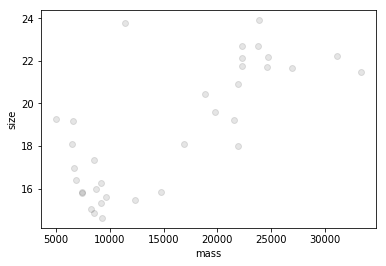

In [65]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

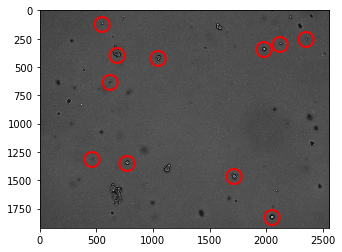

In [66]:
plt.figure()
tp.annotate(t1[t1['frame']==0],frames[0]);

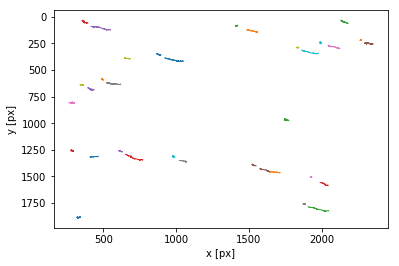

In [67]:
plt.figure()
tp.plot_traj(t1);

In [68]:
d = tp.compute_drift(t1)

d:\users\guype\appdata\local\programs\python\python37\lib\site-packages\trackpy\utils.py:313: FutureWarning: 'frame' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  return df.sort_values(*args, by=by, **kwargs)
d:\users\guype\appdata\local\programs\python\python37\lib\site-packages\trackpy\motion.py:289: FutureWarning: 'frame' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  dx = f_diff.loc[mask, pos_columns + ['frame']].groupby('frame').mean()


<Figure size 432x288 with 0 Axes>

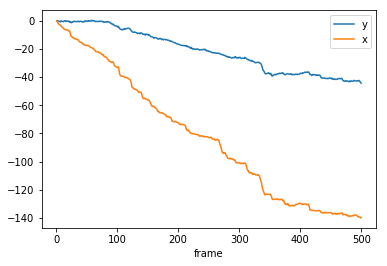

In [69]:
plt.figure()
d.plot();

In [70]:
tm = tp.subtract_drift(t1.copy(),d)

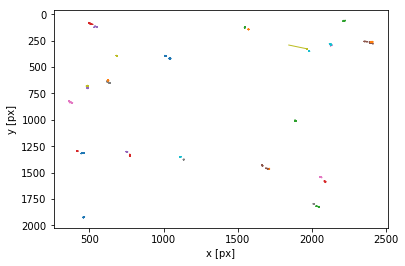

In [71]:
plt.figure()
ax = tp.plot_traj(tm)

In [77]:
im = tp.imsd(tm, 100/285.,10)

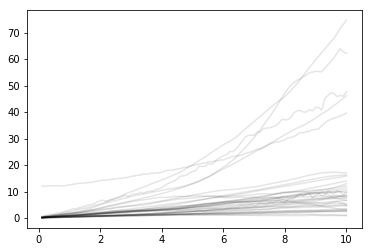

In [88]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha = 0.1);
# ax.set_xscale('log')
# ax.set_yscale('log')


In [83]:
em = tp.emsd(tm,100/285.,10)

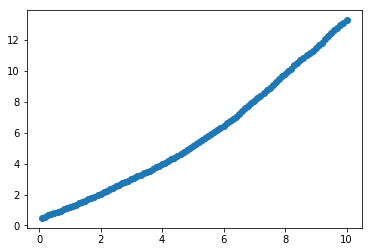

In [86]:
fig,ax = plt.subplots()
ax.plot(em.index,em,'o')
# ax.set_xscale('log')
# ax.set_yscale('log')


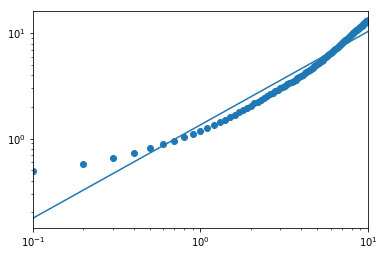

,n,A
msd,0.885969,1.351331


In [87]:
plt.figure()
tp.utils.fit_powerlaw(em)